<Axes: xlabel='0', ylabel='1'>

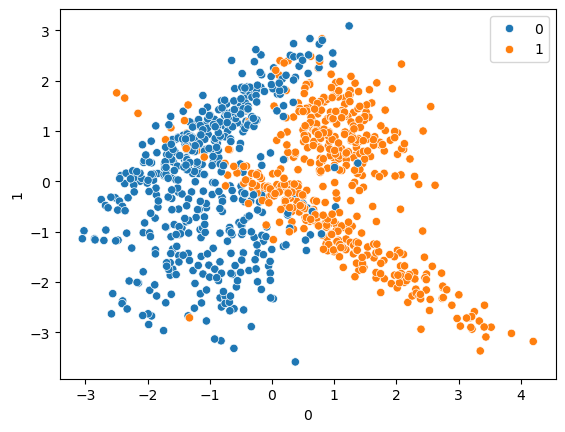

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Create synthetic data points
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)
x,y
pd.DataFrame(x).head()
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
svc.coef_
y_pred=svc.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.91      0.88      0.90       109
           1       0.86      0.90      0.88        91

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200

[[96 13]
 [ 9 82]]


In [9]:
svc1=SVC(kernel='rbf')
svc1.fit(x_train,y_train)
y_pred1=svc1.predict(x_test)
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       109
           1       0.92      0.92      0.92        91

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

[[102   7]
 [  7  84]]


In [10]:
svc2=SVC(kernel='sigmoid')
svc2.fit(x_train,y_train)
y_pred2=svc2.predict(x_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       109
           1       0.82      0.84      0.83        91

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

[[92 17]
 [15 76]]


In [11]:
svc3=SVC(kernel='poly')
svc3.fit(x_train,y_train)
y_pred3=svc3.predict(x_test)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       109
           1       0.83      0.91      0.87        91

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200

[[92 17]
 [ 8 83]]


In [12]:
# Hyperparameter Tuning with SVC

from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf','poly','sigmoid','linear']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(x_train,y_train)
grid.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.931 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.919 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.944 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.875 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.906 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.894 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.894 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.894 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.725 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoi

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [13]:
y_pred4=grid.predict(x_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       109
           1       0.92      0.92      0.92        91

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

[[102   7]
 [  7  84]]
